In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from scipy.stats import zscore
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import warnings
import matplotlib.pyplot as mpt
import matplotlib.cm as cm

In [3]:
cluster_df=pd.read_csv(r'cars-dataset.csv')

In [4]:
cluster_df.head(5)

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0


In [5]:
cluster_df.sample(10)

,car name,cyl,disp,hp,wt,acc,yr,mpg
328,mercedes-benz 240d,4,146.0,67,3250,21.8,80,30.0
382,toyota corolla,4,108.0,70,2245,16.9,82,34.0
81,datsun 510 (sw),4,97.0,92,2288,17.0,72,28.0
293,vw rabbit custom,4,89.0,71,1925,14.0,79,31.9
268,datsun 510,4,119.0,97,2300,14.7,78,27.2
32,ford pinto,4,98.0,?,2046,19.0,71,25.0
327,audi 5000s (diesel),5,121.0,67,2950,19.9,80,36.4
207,volvo 245,4,130.0,102,3150,15.7,76,20.0
79,renault 12 (sw),4,96.0,69,2189,18.0,72,26.0
64,plymouth fury iii,8,318.0,150,4135,13.5,72,15.0


In [6]:
cluster_df.shape

(398, 8)

In [7]:
cluster_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


In [8]:
cluster_df.isnull().sum()

car name    0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
mpg         0
dtype: int64

Attribute HP and Car-name is of object datatype. Car name attribute can be object because of string data type.
But there is no possibility of HP attribute to be in object data type. Also, there is no null values present in the column.

In [9]:
cluster_df['hp'].value_counts()

150    22
90     20
88     19
110    18
100    17
95     14
75     14
67     12
70     12
105    12
65     10
97      9
85      9
80      7
145     7
140     7
72      6
?       6
92      6
78      6
84      6
68      6
180     5
170     5
86      5
130     5
60      5
71      5
115     5
175     5
       ..
113     1
142     1
148     1
49      1
94      1
200     1
91      1
149     1
210     1
133     1
108     1
208     1
77      1
102     1
193     1
122     1
167     1
152     1
135     1
138     1
132     1
82      1
158     1
66      1
61      1
116     1
107     1
93      1
54      1
137     1
Name: hp, Length: 94, dtype: int64

we have six '?' symbols present in the hp attribute which has to be treated as missing values.

In [10]:
cluster_df['hp'] = cluster_df['hp'].replace('?',0)

In [11]:
cluster_df['hp'] = cluster_df['hp'].replace(0,cluster_df['hp'].median())

In [12]:
cluster_df.dtypes

car name     object
cyl           int64
disp        float64
hp           object
wt            int64
acc         float64
yr            int64
mpg         float64
dtype: object

In [13]:
cluster_df['hp'] = pd.to_numeric(cluster_df['hp'])

In [14]:
(cluster_df.iloc[:0:7])[~cluster_df.iloc[:0:7].applymap(np.isreal).all(1)]

,car name,cyl,disp,hp,wt,acc,yr,mpg


In [15]:
cluster_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
hp,398.0,104.281407,38.229470,46.0,76.000,92.0,125.000,230.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6


In [16]:
cluster_df.skew()

cyl     0.526922
disp    0.719645
hp      1.107250
wt      0.531063
acc     0.278777
yr      0.011535
mpg     0.457066
dtype: float64

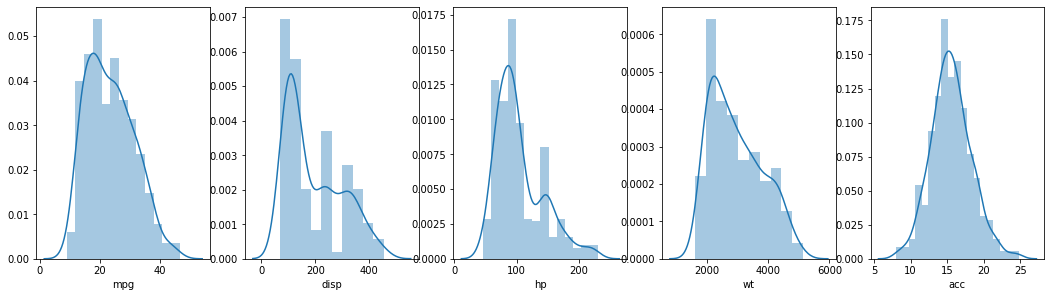

In [17]:
f, axes = mpt.subplots(1, 5, figsize=(7, 7))
sns.distplot(cluster_df['mpg'], ax = axes[0])
sns.distplot(cluster_df['disp'], ax = axes[1])
sns.distplot(cluster_df['hp'], ax = axes[2])
sns.distplot(cluster_df['wt'], ax = axes[3])
sns.distplot(cluster_df['acc'], ax = axes[4])
mpt.subplots_adjust(top =  1.5, right = 10, left = 8, bottom = 1)

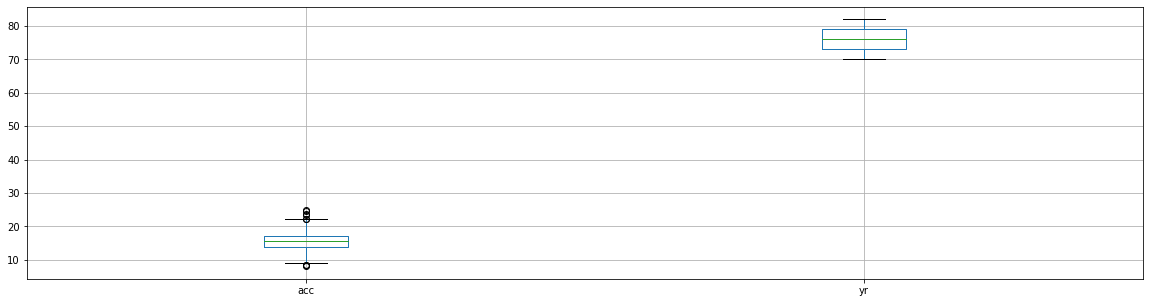

In [18]:
cluster_df.boxplot(column=['acc','yr'],figsize=(20,5))

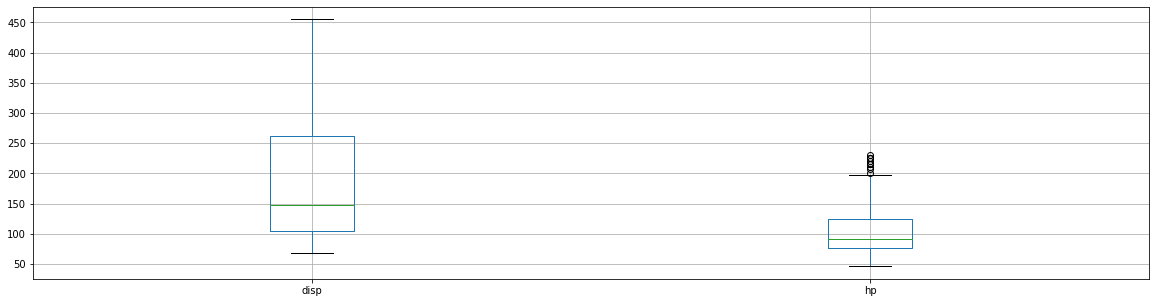

In [19]:
cluster_df.boxplot(column=['disp','hp',],figsize=(20,5))

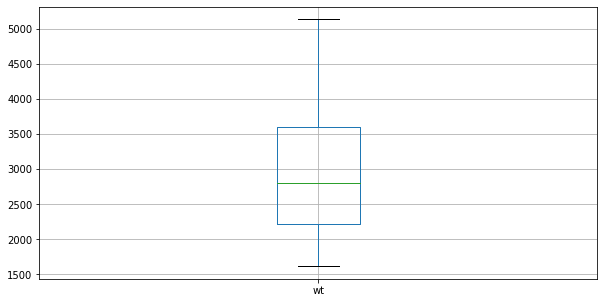

In [20]:
cluster_df.boxplot(column=['wt'],figsize=(10,5))

In [21]:
cluster_df.corr()

,cyl,disp,hp,wt,acc,yr,mpg
cyl,1.000000,0.950721,0.841525,0.896017,-0.505419,-0.348746,-0.775396
disp,0.950721,1.000000,0.895984,0.932824,-0.543684,-0.370164,-0.804203
hp,0.841525,0.895984,1.000000,0.862615,-0.686843,-0.413978,-0.773655
wt,0.896017,0.932824,0.862615,1.000000,-0.417457,-0.306564,-0.831741
acc,-0.505419,-0.543684,-0.686843,-0.417457,1.000000,0.288137,0.420289
yr,-0.348746,-0.370164,-0.413978,-0.306564,0.288137,1.000000,0.579267
mpg,-0.775396,-0.804203,-0.773655,-0.831741,0.420289,0.579267,1.000000


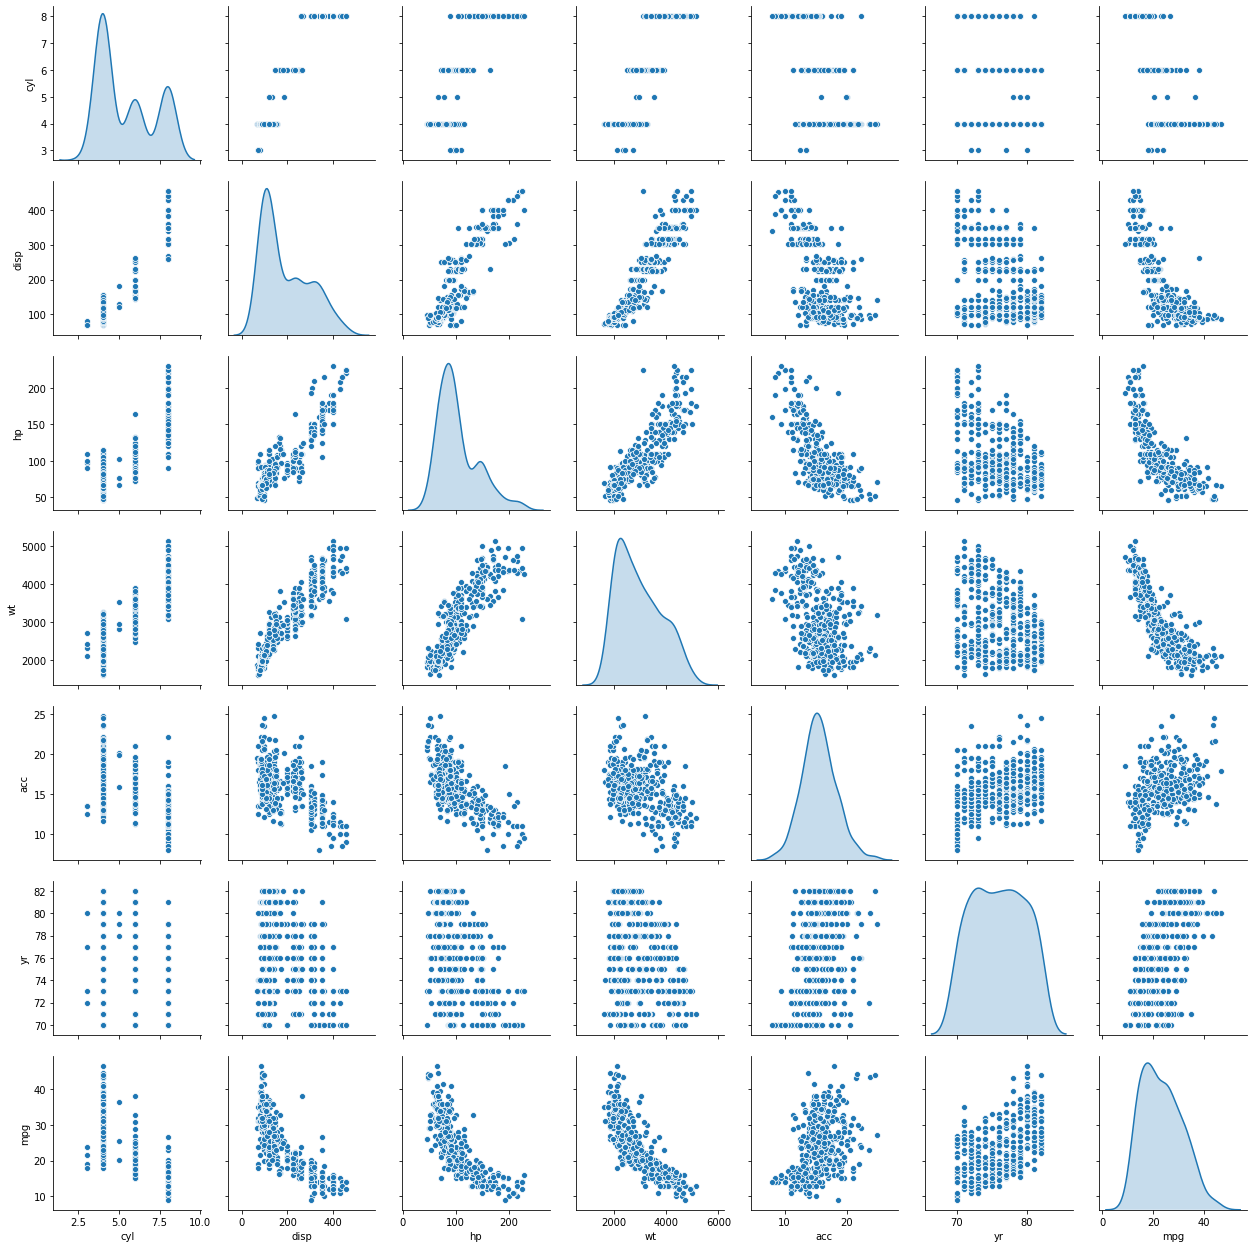

In [22]:
sns.pairplot(cluster_df,diag_kind='kde')

 Observations:
 
    1) HP and Acc attributes has outliers
    
    2) All the attributes are positively skewed attributes.
    
    3) Numbers of peaks in the diagonal represent the data are from different classes and 3 or more possible Gaussian mixture.
    
    4) Cyl,disp,hp,wt attributes have strong possitive correlations with each others.
    
    5) mpg attribute has strong negative correllation with cyl,disp,hp,wt attributes.
    
    6) Attribute acc has only one peak which will not helpfull to separate the clusters effectively.
    
    7) Cyl attribute is very usefull to separate the cluster.
    
    8) yr attribute shows minimum of 2 or more overlapping gaussians.
    
    9) disp attritube also represents possibilities of 3 or more gaussians.
    

In [23]:
cluster_df= cluster_df.drop(['car name'], axis=1)

In [24]:
cluster_df.head(5)

,cyl,disp,hp,wt,acc,yr,mpg
0,8,307.0,130.0,3504,12.0,70,18.0
1,8,350.0,165.0,3693,11.5,70,15.0
2,8,318.0,150.0,3436,11.0,70,18.0
3,8,304.0,150.0,3433,12.0,70,16.0
4,8,302.0,140.0,3449,10.5,70,17.0


###### Since the dataset was used in the year 1983, deleting the Yr column and adding new column called age which will give us how old the car is?

In [25]:
cluster_df['age']= 83-cluster_df['yr']

In [26]:
cluster_df.sample(10)

,cyl,disp,hp,wt,acc,yr,mpg,age
193,6,200.0,81.0,3012,17.6,76,24.0,7
192,6,250.0,105.0,3353,14.5,76,22.0,7
107,6,232.0,100.0,2789,15.0,73,18.0,10
140,8,304.0,150.0,4257,15.5,74,14.0,9
290,8,351.0,142.0,4054,14.3,79,15.5,4
147,4,90.0,75.0,2108,15.5,74,24.0,9
33,6,232.0,100.0,2634,13.0,71,19.0,12
343,4,79.0,58.0,1755,16.9,81,39.1,2
329,4,91.0,67.0,1850,13.8,80,44.6,3
13,8,455.0,225.0,3086,10.0,70,14.0,13


In [27]:
cluster_df= cluster_df.drop(['yr'],axis=1)

In [28]:
cluster_df.tail(5)

,cyl,disp,hp,wt,acc,mpg,age
393,4,140.0,86.0,2790,15.6,27.0,1
394,4,97.0,52.0,2130,24.6,44.0,1
395,4,135.0,84.0,2295,11.6,32.0,1
396,4,120.0,79.0,2625,18.6,28.0,1
397,4,119.0,82.0,2720,19.4,31.0,1


In [29]:
cluster_df_z= cluster_df.apply(zscore)

In [30]:
cluster_df_z.head(5)

,cyl,disp,hp,wt,acc,mpg,age
0,1.498191,1.090604,0.673589,0.630870,-1.295498,-0.706439,1.627426
1,1.498191,1.503514,1.590266,0.854333,-1.477038,-1.090751,1.627426
2,1.498191,1.196232,1.197404,0.550470,-1.658577,-0.706439,1.627426
3,1.498191,1.061796,1.197404,0.546923,-1.295498,-0.962647,1.627426
4,1.498191,1.042591,0.935497,0.565841,-1.840117,-0.834543,1.627426


In [31]:
cluster_df_z.shape

(398, 7)

In [32]:
cluster_range = range( 1, 10)  
cluster_errors = []
cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(cluster_df_z)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_errors.append( clusters.inertia_ )    # capture the intertia
  


# combine the cluster_range and cluster_errors into a dataframe by combining them
formedclusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors} )
formedclusters_df[0:15]

,num_clusters,cluster_errors
0,1,2786.000000
1,2,1294.705302
2,3,946.106246
3,4,738.239928
4,5,665.363962
5,6,595.463154
6,7,545.678866
7,8,496.085543
8,9,457.011690


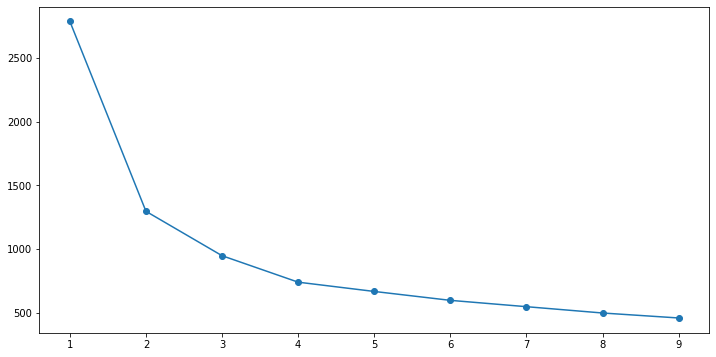

In [35]:
mpt.figure(figsize=(12,6))
mpt.plot( formedclusters_df.num_clusters, formedclusters_df.cluster_errors, marker = "o" )

There is no perfect elbow formed elbow chart except n = 2 clusters.However, for the given the business problem 2 forming two clusters will be effective.

For n_clusters = 2 The average silhouette_score is : 0.48239980258292087
For n_clusters = 3 The average silhouette_score is : 0.35320415023156115
For n_clusters = 4 The average silhouette_score is : 0.3485141972400436
For n_clusters = 5 The average silhouette_score is : 0.3150611109037894
For n_clusters = 6 The average silhouette_score is : 0.27827112081917454
For n_clusters = 7 The average silhouette_score is : 0.2855125421940793
For n_clusters = 8 The average silhouette_score is : 0.27492199571859444


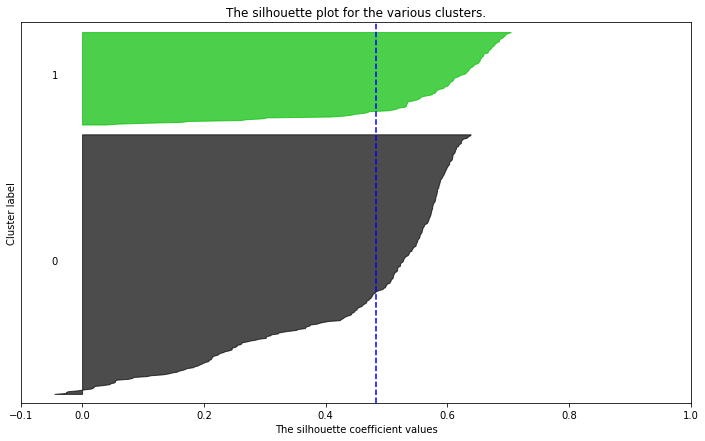

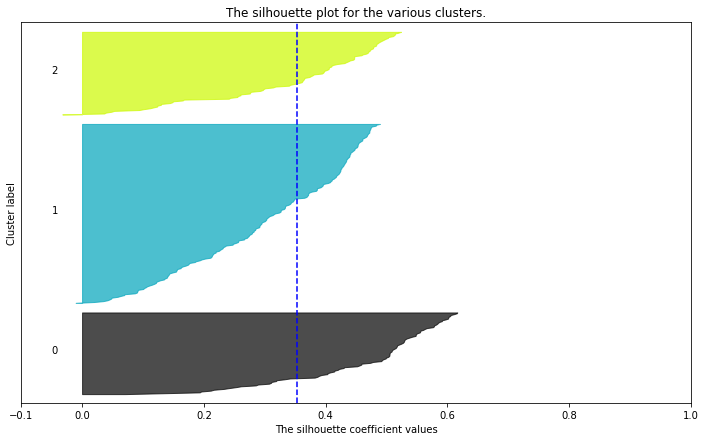

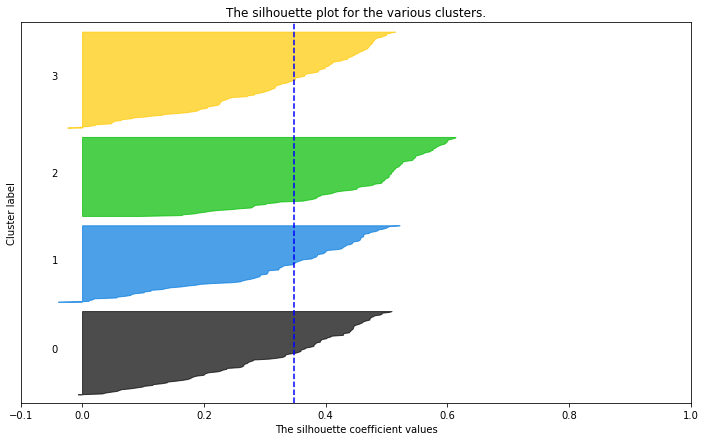

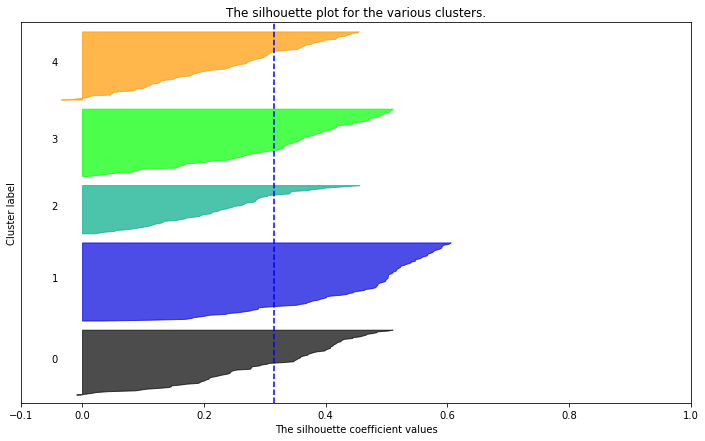

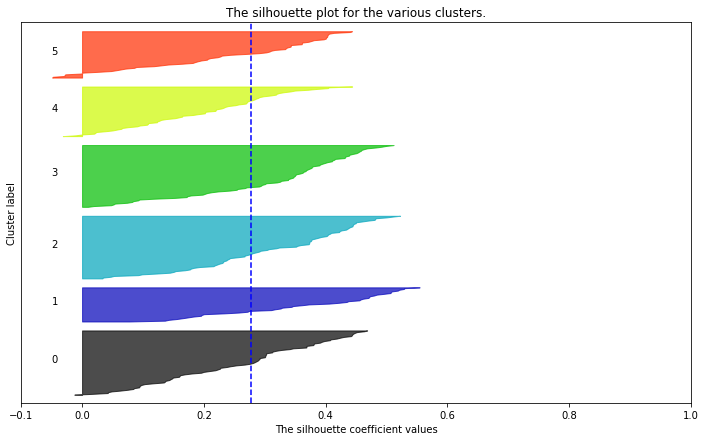

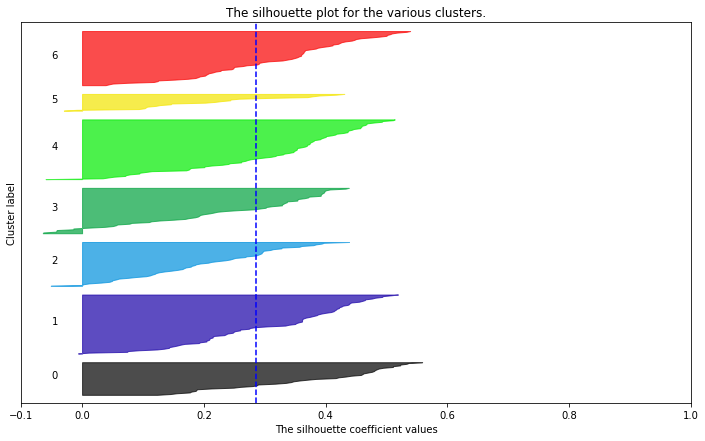

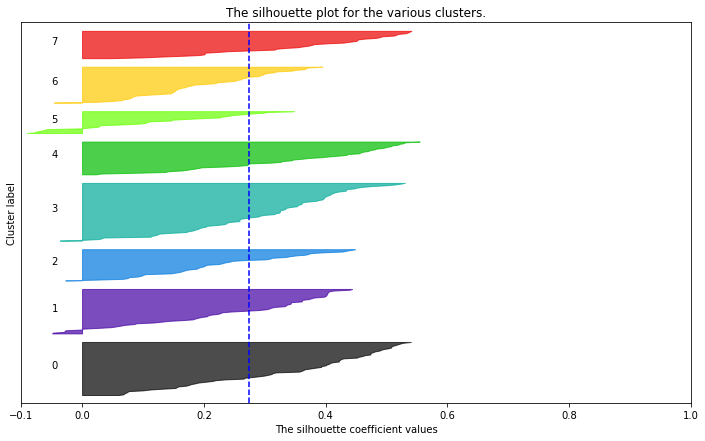

In [38]:
X = cluster_df_z
range_n_clusters = [2, 3, 4,5,6,7,8]

for n_clusters in range_n_clusters:
    fig, (ax1) = mpt.subplots(1)
    fig.set_size_inches(12, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="blue", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

mpt.show()

From the silhouette plot forming n=4 clusters may be the possible ideal cluster number for the given business problem

In [39]:
km = KMeans(n_clusters=4)
kmeans = km.fit(cluster_df_z)
labels = kmeans.predict(cluster_df_z)
centroids = kmeans.cluster_centers_
print("Centroid values")
print(centroids)

Centroid values
[[ 1.49819126  1.50392292  1.5220026   1.40409797 -1.0861486  -1.16379715
   0.68832385]
 [ 0.42443037  0.30530323 -0.03759036  0.33776539  0.29367006 -0.49682681
  -0.03298635]
 [-0.82534015 -0.78164519 -0.74117086 -0.76856959  0.37498307  1.18017325
  -1.10179281]
 [-0.86226631 -0.8085232  -0.55711154 -0.75863563  0.32955478  0.20271132
   0.64549188]]


In [40]:
clustering= kmeans.predict(cluster_df_z)
cluster_df_z["cluster_label"] = clustering

In [41]:
cluster_df_z['cluster_label'].value_counts()

2    114
3     99
0     94
1     91
Name: cluster_label, dtype: int64

In [42]:
pd.DataFrame(centroids)

,0,1,2,3,4,5,6
0,1.498191,1.503923,1.522003,1.404098,-1.086149,-1.163797,0.688324
1,0.424430,0.305303,-0.037590,0.337765,0.293670,-0.496827,-0.032986
2,-0.825340,-0.781645,-0.741171,-0.768570,0.374983,1.180173,-1.101793
3,-0.862266,-0.808523,-0.557112,-0.758636,0.329555,0.202711,0.645492


In [43]:
cluster_df_z.sample(4)

,cyl,disp,hp,wt,acc,mpg,age,cluster_label
374,-0.856321,-0.407398,-0.321659,0.076350,1.790672,-0.065919,-1.621983,2
61,-0.856321,-0.685872,-0.478804,-0.880166,0.338357,-0.322127,1.085858,3
117,-0.856321,-1.204411,-1.447862,-1.304628,1.427593,0.702705,0.815074,3
237,-0.856321,-0.916334,-1.081191,-1.087077,0.519896,0.894861,-0.268063,2


# Linear regression model for cluster '0'

In [44]:
cluster_df_z_0= cluster_df_z.loc[cluster_df_z['cluster_label']==0]

In [45]:
X=cluster_df_z_0.drop(['mpg','cluster_label'],axis=1)

In [46]:
y=cluster_df_z_0[['mpg']]

In [47]:
X_train,X_test,Y_train,Y_test= train_test_split(X,y,test_size=.30,random_state=1)

In [48]:
regression_model = LinearRegression()
regression_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
Y_predict= regression_model.predict(X_test)

In [50]:
regression_model.score(X_train, Y_train)

0.6349132439392119

In [51]:
regression_model.score(X_test, Y_test)

0.31225183013781477

In [52]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for cyl is 0.0
The coefficient for disp is 0.005410946309572404
The coefficient for hp is -0.16687050143175045
The coefficient for wt is -0.14001796041448922
The coefficient for acc is -0.16726899813012833
The coefficient for age is -0.14723398127381251


In [53]:
intercept = regression_model.intercept_[0]

print("The intercept for cluster 1 model is {}".format(intercept))

The intercept for cluster 1 model is -0.7927810160674889


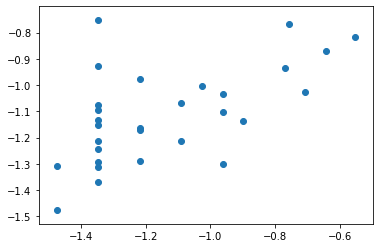

In [54]:
mpt.scatter(Y_test, Y_predict)

# Linear Regression model for Cluster '1'

In [55]:
cluster_df_z_1= cluster_df_z.loc[cluster_df_z['cluster_label']==1]

In [56]:
X=cluster_df_z_1.drop(['mpg','cluster_label'],axis=1)
y=cluster_df_z_1[['mpg']]

In [57]:
X_train,X_test,Y_train,Y_test= train_test_split(X,y,test_size=.30,random_state=1)

In [58]:
X_train.shape

(63, 6)

In [59]:
X_test.shape

(28, 6)

In [60]:
Y_train.shape

(63, 1)

In [61]:
Y_test.shape

(28, 1)

In [62]:
regression_model1 = LinearRegression()
regression_model1.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [63]:
Y_predict= regression_model1.predict(X_test)

In [64]:
regression_model1.score(X_train, Y_train)

0.5177978179146396

In [65]:
regression_model1.score(X_test, Y_test)

0.3000518196585801

In [66]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model1.coef_[0][idx]))

The coefficient for cyl is 0.18015136250405495
The coefficient for disp is -0.047358226015080246
The coefficient for hp is -0.19624785009622167
The coefficient for wt is -0.4104719678476632
The coefficient for acc is -0.0731404485325613
The coefficient for age is -0.2565949187855116


In [67]:
intercept = regression_model1.intercept_[0]

print("The intercept for cluster 2 model is {}".format(intercept))

The intercept for cluster 2 model is -0.4105527676440367


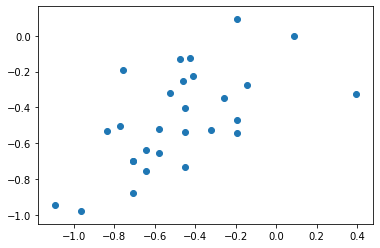

In [68]:
mpt.scatter(Y_test, Y_predict)

# Linear Regression model for Cluster '2'

In [69]:
cluster_df_z_2= cluster_df_z.loc[cluster_df_z['cluster_label']==2]

In [70]:
X1=cluster_df_z_2.drop(['mpg','cluster_label'],axis=1)
y1=cluster_df_z_2[['mpg']]

In [71]:
X_train,X_test,Y_train,Y_test= train_test_split(X1,y1,test_size=.30,random_state=1)

In [72]:
X_train.shape

(79, 6)

In [73]:
X_test.shape

(35, 6)

In [74]:
Y_train.shape

(79, 1)

In [75]:
Y_test.shape

(35, 1)

In [76]:
regression_model2 = LinearRegression()
regression_model2.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [77]:
Y_predict= regression_model2.predict(X_test)

In [78]:
regression_model2.score(X_train, Y_train)

0.5481563196423707

In [79]:
regression_model2.score(X_test, Y_test)

0.5150306604458388

In [80]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model2.coef_[0][idx]))

The coefficient for cyl is 0.7118898877488998
The coefficient for disp is 0.2346645508509745
The coefficient for hp is -0.431502401244759
The coefficient for wt is -0.9887598711706251
The coefficient for acc is 0.15647690316882784
The coefficient for age is -0.41032499882756707


In [81]:
intercept = regression_model2.intercept_[0]

print("The intercept for cluster 3 model is {}".format(intercept))

The intercept for cluster 3 model is 0.3658008851098523


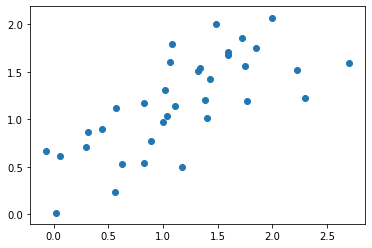

In [82]:
mpt.scatter(Y_test, Y_predict)

# Linear Regression model for Cluster '3'

In [83]:
cluster_df_z_3= cluster_df_z.loc[cluster_df_z['cluster_label']==3]

In [84]:
X1=cluster_df_z_3.drop(['mpg','cluster_label'],axis=1)
y1=cluster_df_z_3[['mpg']]

In [85]:
X_train,X_test,Y_train,Y_test= train_test_split(X1,y1,test_size=.30,random_state=1)

In [86]:
X_train.shape

(69, 6)

In [87]:
X_test.shape

(30, 6)

In [88]:
Y_train.shape

(69, 1)

In [89]:
Y_test.shape

(30, 1)

In [90]:
regression_model3 = LinearRegression()
regression_model3.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [91]:
Y_predict= regression_model3.predict(X_test)

In [92]:
regression_model3.score(X_train, Y_train)

0.5781827659648392

In [93]:
regression_model3.score(X_test, Y_test)

0.5727009221743724

In [94]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model3.coef_[0][idx]))

The coefficient for cyl is 0.5033968053557311
The coefficient for disp is -0.5881065746647324
The coefficient for hp is -0.27552230488747
The coefficient for wt is -0.5111615655363423
The coefficient for acc is -0.1396100181840158
The coefficient for age is -0.12885129347997681


In [95]:
intercept = regression_model3.intercept_[0]

print("The intercept for cluster 3 model is {}".format(intercept))

The intercept for cluster 3 model is -0.21918042548614827


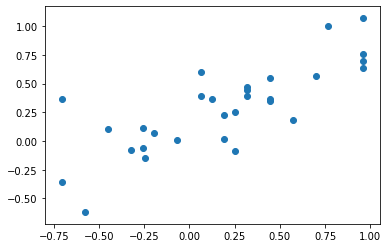

In [96]:
mpt.scatter(Y_test, Y_predict)